In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as  sns 
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
app = pd.read_csv(r"C:\Users\91800\Downloads\application_data.csv")

In [6]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Feature Selection

In [7]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
app.shape

(307511, 122)

In [9]:
msg_info = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msg_info.rename(columns = {"index":"col_name",0:"null_count"},inplace = True)
msg_info.head()

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0


In [10]:
msg_info['msg_pct']=msg_info['null_count']/app.shape[0]*100
msg_info
msg_info.head()

,col_name,null_count,msg_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [11]:
msg_info.to_csv(r"C:\Users\91800\Downloads\missing_info.csv",index=False)

In [12]:
msg_col=msg_info[msg_info["msg_pct"]>=40]['col_name'].to_list()
len(msg_col)
app_msg_rmvde = app.drop(labels = msg_col,axis= 1)
app_msg_rmvde.shape

(307511, 73)

In [13]:
flag_col =[]

for col in app_msg_rmvde.columns:
    if  col.startswith("FLAG_"):
        flag_col.append(col)
len(flag_col)

28

In [14]:
flag_tgt_col= app_msg_rmvde[flag_col+['TARGET']]
flag_tgt_col.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='FLAG_DOCUMENT_19', ylabel='count'>

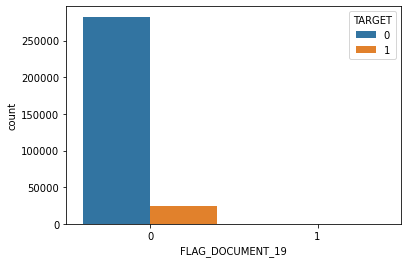

In [15]:
sns.countplot(data = flag_tgt_col,x = "FLAG_DOCUMENT_19", hue ="TARGET")

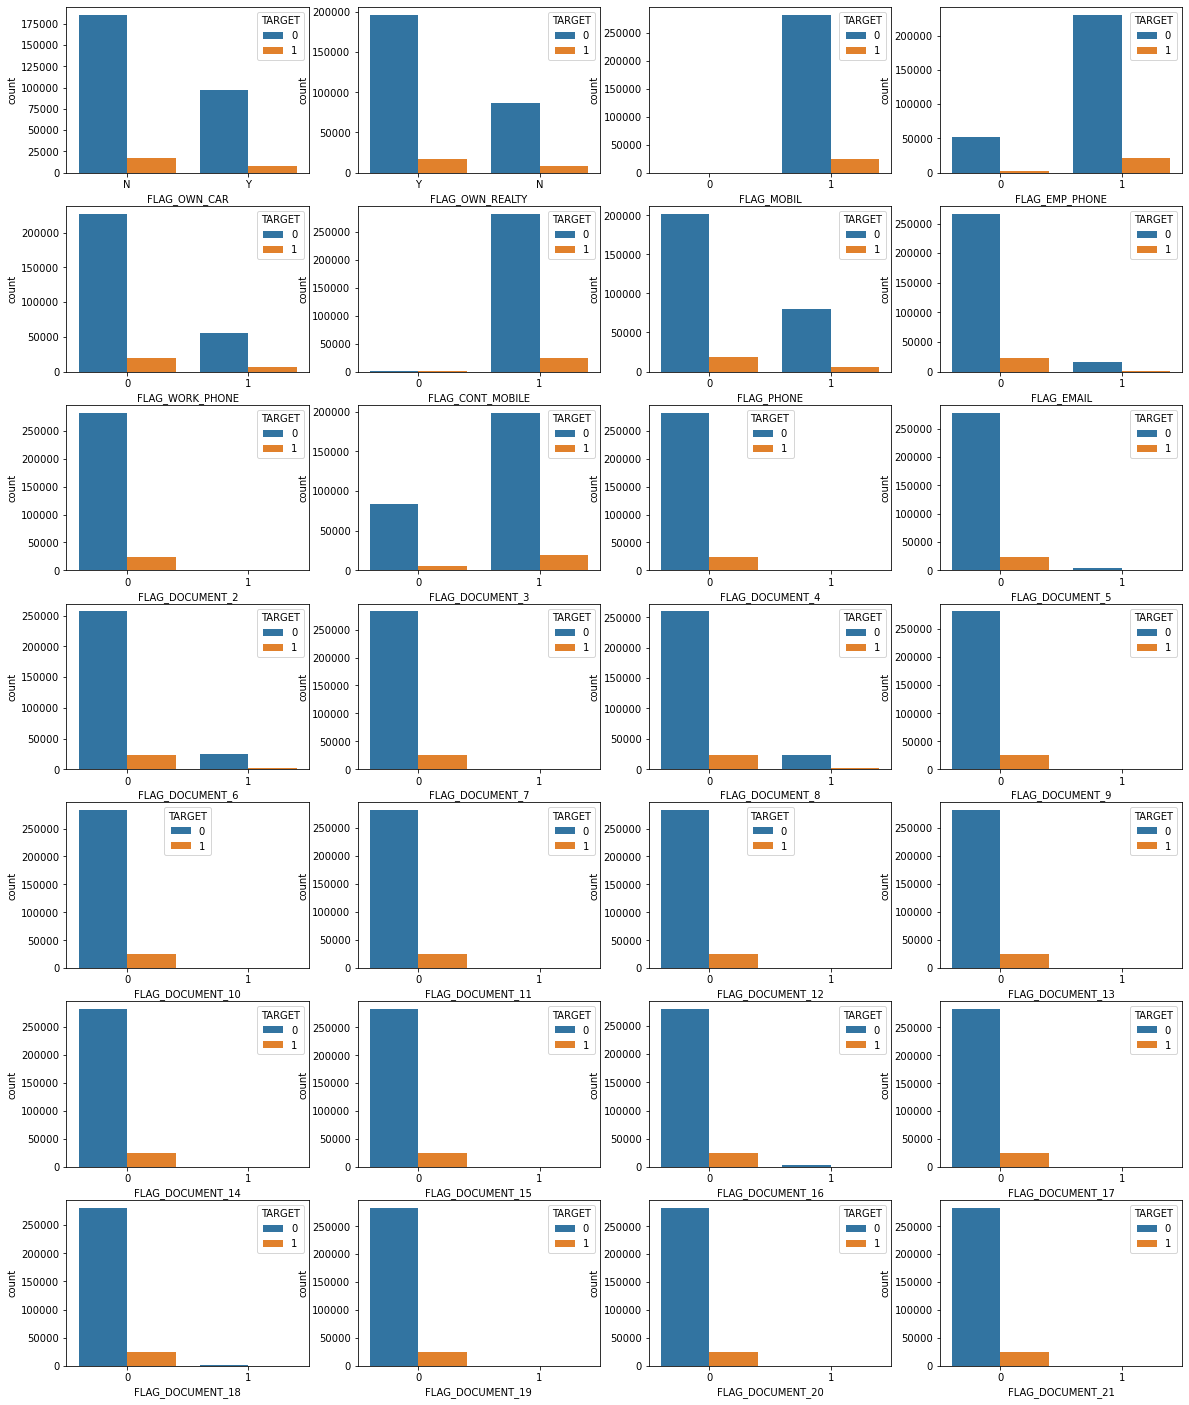

In [16]:
plt.figure(figsize=(20,25))
for i, col in enumerate(flag_col) :
    plt.subplot(7,4,i+1)
    sns.countplot(data = flag_tgt_col,x = col, hue ="TARGET")

In [17]:
flag_corr=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']
flag_corr_df =app_msg_rmvde[flag_corr]

In [18]:
flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [19]:
flag_corr_df['FLAG_OWN_CAR']=flag_corr_df['FLAG_OWN_CAR'].replace({"N":0,"Y":1})
flag_corr_df['FLAG_OWN_REALTY']=flag_corr_df['FLAG_OWN_REALTY'].replace({"N":0,"Y":1})

In [20]:
flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
0    202924
1    104587
dtype: int64

<AxesSubplot:>

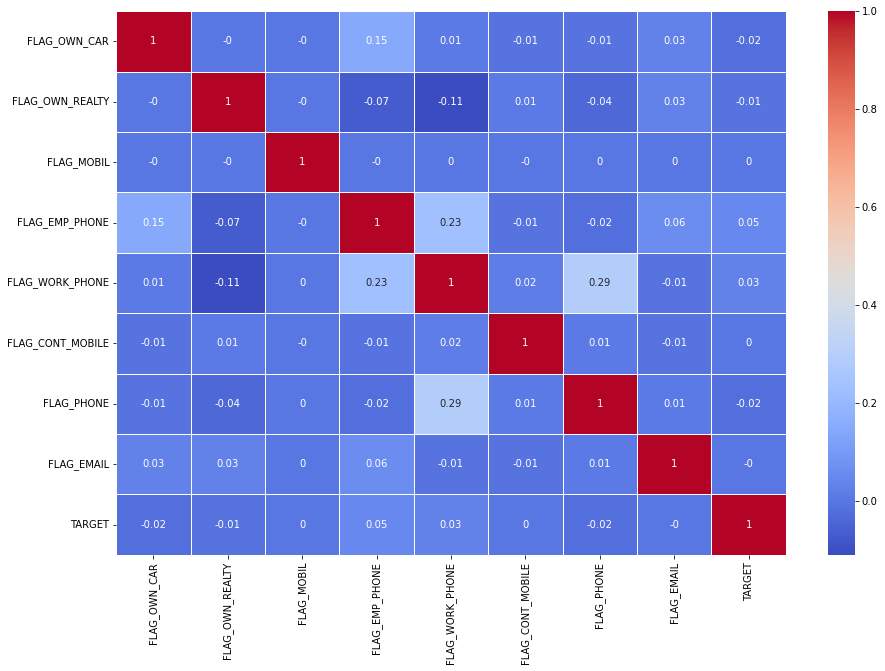

In [21]:
corr_df=round(flag_corr_df.corr(),2)
plt.figure(figsize=(15,10))
sns.heatmap(corr_df,cmap='coolwarm',linewidths=.5,annot=True)

In [22]:
app_flag_rmvde = app_msg_rmvde.drop(labels = flag_col,axis = 1)
app_flag_rmvde.shape                                        

(307511, 45)

<AxesSubplot:>

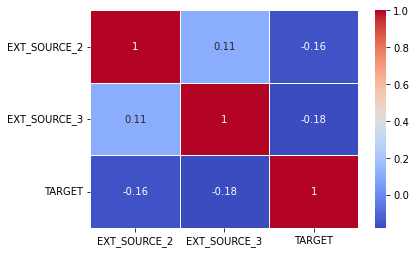

In [23]:
sns.heatmap(data=round(app_flag_rmvde[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',linewidths=.5,annot=True)

In [24]:
app_score_col_rmved=app_flag_rmvde.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
app_score_col_rmved.shape

(307511, 43)

## Feature engineering

In [25]:
app_score_col_rmved.isnull().sum().sort_values()/app_score_col_rmved.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


## Missing Imputation

In [26]:
app_score_col_rmved.groupby("CNT_FAM_MEMBERS").size()

CNT_FAM_MEMBERS
1.0      67847
2.0     158357
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
dtype: int64

In [27]:
app_score_col_rmved['CNT_FAM_MEMBERS'].mode()[0]

2.0

In [28]:
app_score_col_rmved['CNT_FAM_MEMBERS']=app_score_col_rmved['CNT_FAM_MEMBERS'].fillna(app_score_col_rmved['CNT_FAM_MEMBERS'].mode()[0])

In [29]:
app_score_col_rmved['CNT_FAM_MEMBERS'].isnull().sum()

0

In [30]:
app_score_col_rmved['OCCUPATION_TYPE'].value_counts().sort_values()

IT staff                   526
HR staff                   563
Realty agents              751
Secretaries               1305
Waiters/barmen staff      1348
Low-skill Laborers        2093
Private service staff     2652
Cleaning staff            4653
Cooking staff             5946
Security staff            6721
Medicine staff            8537
Accountants               9813
High skill tech staff    11380
Drivers                  18603
Managers                 21371
Core staff               27570
Sales staff              32102
Laborers                 55186
Name: OCCUPATION_TYPE, dtype: int64

In [31]:
app_score_col_rmved['OCCUPATION_TYPE']=app_score_col_rmved['OCCUPATION_TYPE'].fillna(app_score_col_rmved['OCCUPATION_TYPE'].mode()[0])

In [32]:
app_score_col_rmved['OCCUPATION_TYPE'].isnull().sum()

0

In [33]:
app_score_col_rmved['NAME_TYPE_SUITE'].isnull().sum()

1292

In [34]:
app_score_col_rmved['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [35]:
app_score_col_rmved['NAME_TYPE_SUITE']=app_score_col_rmved['NAME_TYPE_SUITE'].fillna(app_score_col_rmved['NAME_TYPE_SUITE'].mode()[0])

In [36]:
app_score_col_rmved['NAME_TYPE_SUITE'].isnull().sum()

0

In [37]:
app_score_col_rmved['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [38]:
app_score_col_rmved['AMT_ANNUITY']=app_score_col_rmved['AMT_ANNUITY'].fillna(app_score_col_rmved['AMT_ANNUITY'].mean())

In [39]:
app_score_col_rmved['AMT_ANNUITY'].isnull().sum()

0

In [40]:
app_score_col_rmved['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [41]:
amt_req_col = []
for col in app_score_col_rmved.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)
        
#app_score_col_rmved['AMT_REQ_CREDIT_BUREAU_QRT'].head()

In [42]:
for col in amt_req_col:
    app_score_col_rmved[col]=app_score_col_rmved[col].fillna((app_score_col_rmved[col].median()))
    

In [43]:
app_score_col_rmved['AMT_GOODS_PRICE'].isnull().sum()

278

In [44]:
app_score_col_rmved['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [45]:
app_score_col_rmved['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [46]:
# outerliar

In [47]:
app_score_col_rmved['AMT_GOODS_PRICE']=app_score_col_rmved['AMT_GOODS_PRICE'].fillna((app_score_col_rmved['AMT_GOODS_PRICE'].median()))

In [48]:
app_score_col_rmved['AMT_GOODS_PRICE'].isnull().sum()

0

In [49]:
app_score_col_rmved.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


## value modification

In [50]:
days_col = []

for col in app_score_col_rmved.columns:
    if col.startswith("DAYS"):
        days_col.append(col)
        
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [51]:
for col in days_col:
    app_score_col_rmved[col]=abs(app_score_col_rmved[col])

In [52]:
app_score_col_rmved.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
app_score_col_rmved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [54]:
app_score_col_rmved.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

In [55]:
app_score_col_rmved['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

## Outlier detection & treatment

In [56]:
app_score_col_rmved['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

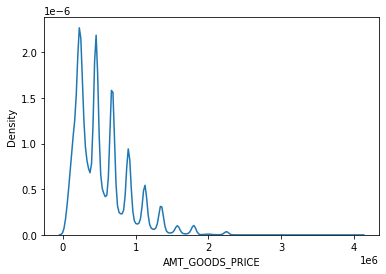

In [57]:
sns.kdeplot(data=app_score_col_rmved,x='AMT_GOODS_PRICE')

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

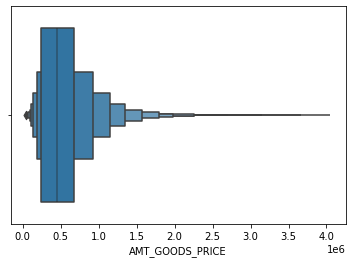

In [58]:
sns.boxenplot(data=app_score_col_rmved,x="AMT_GOODS_PRICE")

In [59]:
app_score_col_rmved['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [60]:
app_score_col_rmved['AMT_GOODS_PRICE'].max()

4050000.0

In [61]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ["0-100k","100k-200k","200k-300k","300k-400k","400k-500k","500k-600k","600k-700k","700k-800k","800k-900k","Above 900k"]

app_score_col_rmved['AMT_GOODS_PRICE_RANGE']=pd.cut(app_score_col_rmved['AMT_GOODS_PRICE'],bins,labels=ranges)

In [62]:
app_score_col_rmved['AMT_GOODS_PRICE_RANGE'].value_counts().sort_values()

700k-800k      8110
0-100k         8709
500k-600k     13117
300k-400k     21219
800k-900k     21484
100k-200k     32956
600k-700k     40024
Above 900k    41880
400k-500k     57251
200k-300k     62761
Name: AMT_GOODS_PRICE_RANGE, dtype: int64

In [63]:
app_score_col_rmved['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [64]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,472500]
ranges = ["0-100k","100k-150k","150k-200k","200k-250k","250k-300k","300k-350k","350k-400k","Above 400k"]

app_score_col_rmved["AMT_INCOME_TOTAL_RANGE"]=pd.cut(app_score_col_rmved['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [65]:
app_score_col_rmved['AMT_INCOME_TOTAL_RANGE'].value_counts().sort_values()

Above 400k     5049
350k-400k      5802
300k-350k      8874
250k-300k     17039
200k-250k     48137
0-100k        63698
150k-200k     64307
100k-150k     91591
Name: AMT_INCOME_TOTAL_RANGE, dtype: int64

In [66]:
app_score_col_rmved['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [67]:
bins = [0,200000,400000,600000,800000,900000,1000000,1854000]
ranges = ["0-200k","200k-400k","400k-600k","600k-800k","800k-900k","900k-1M","Above 1M"]

app_score_col_rmved["AMT_CREDIT_RANGE"]=pd.cut(app_score_col_rmved['AMT_CREDIT'],bins,labels=ranges)

In [68]:
app_score_col_rmved['AMT_CREDIT_RANGE'].value_counts().sort_values()

900k-1M       8927
800k-900k    21792
0-200k       36144
600k-800k    43242
Above 1M     46910
400k-600k    66270
200k-400k    81151
Name: AMT_CREDIT_RANGE, dtype: int64

In [69]:
app_score_col_rmved['AMT_CREDIT'].max()

4050000.0

In [70]:
app_score_col_rmved['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [71]:
app_score_col_rmved['AMT_ANNUITY'].max()

258025.5

In [72]:
bins = [0,50000,100000,150000,200000,258025]
ranges = ["0-50k","50k-100k","100k-150k","150k-200k","Above 200k"]

app_score_col_rmved["AMT_ANNUITY_RANGE"]=pd.cut(app_score_col_rmved['AMT_ANNUITY'],bins,labels=ranges)

In [73]:
app_score_col_rmved.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0-50k         286214
50k-100k       20792
100k-150k        437
150k-200k         32
Above 200k        35
dtype: int64

In [74]:
app_score_col_rmved['AMT_ANNUITY'].isnull().sum()

0

In [75]:
app_score_col_rmved['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [76]:
app_score_col_rmved['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.85,0.9,0.95,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [77]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,365243]

ranges = ["0-5Y","5Y-10Y","10Y-15Y","15Y-20Y","20Y-25Y","25Y-30Y","30Y-35Y","35Y-40Y","40Y-45Y","45Y-50Y","Above 50Y"]

app_score_col_rmved["DAYS_EMPLOYED_RANGE"]=pd.cut(app_score_col_rmved['DAYS_EMPLOYED'],bins,labels=ranges)

In [78]:
app_score_col_rmved.groupby(['DAYS_EMPLOYED_RANGE']).size()

DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
Above 50Y     55374
dtype: int64

In [79]:
app_score_col_rmved['DAYS_BIRTH'].isnull().sum()

0

In [80]:
app_score_col_rmved['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9,0.99])

0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.90    22181.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [81]:
app_score_col_rmved['DAYS_BIRTH'].min()

7489

In [82]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ["20Y","20Y-30Y","30Y-40Y","40Y-50Y","50Y-60Y","Above 60Y"]

app_score_col_rmved["DAYS_BIRTH_RANGE"]=pd.cut(app_score_col_rmved['DAYS_BIRTH'],bins,labels=ranges)

In [83]:
app_score_col_rmved.groupby(['DAYS_BIRTH_RANGE']).size()

DAYS_BIRTH_RANGE
20Y              0
20Y-30Y      45021
30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
Above 60Y    35579
dtype: int64

In [84]:
app_score_col_rmved['DAYS_BIRTH_RANGE'].isnull().sum()

0

## Data Analysis

In [85]:
app_score_col_rmved.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [86]:
obj_var = app_score_col_rmved.select_dtypes(include=['object']).columns

In [87]:
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [88]:
app_score_col_rmved.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

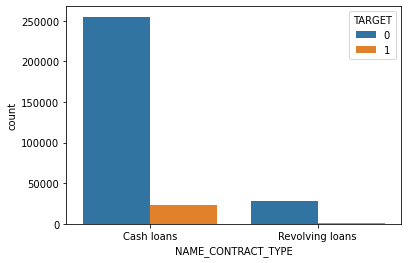

In [89]:
sns.countplot(data=app_score_col_rmved,x='NAME_CONTRACT_TYPE',hue="TARGET")

In [90]:
data_pct=app_score_col_rmved[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()

In [91]:
data_pct['PCT']= data_pct['TARGET']*100

In [92]:
data_pct

,NAME_CONTRACT_TYPE,TARGET,PCT
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

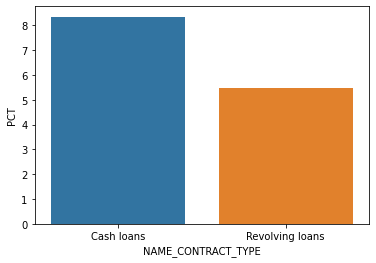

In [93]:
sns.barplot(data=data_pct,x="NAME_CONTRACT_TYPE",y='PCT')

In [94]:
#cash loan are less likely to defaulter 

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

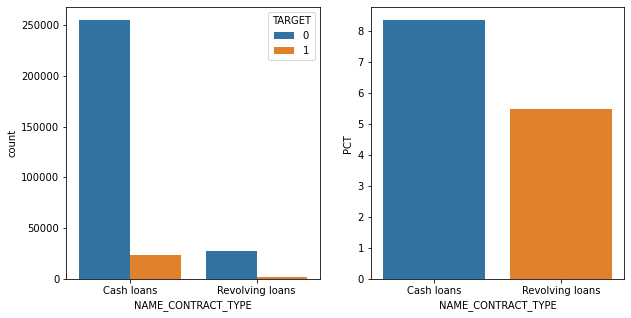

In [95]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmved,x='NAME_CONTRACT_TYPE',hue="TARGET")

plt.subplot(1,2,2)
sns.barplot(data=data_pct,x="NAME_CONTRACT_TYPE",y='PCT')

In [96]:
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [97]:
data_pct['PCT']= data_pct['TARGET']*100

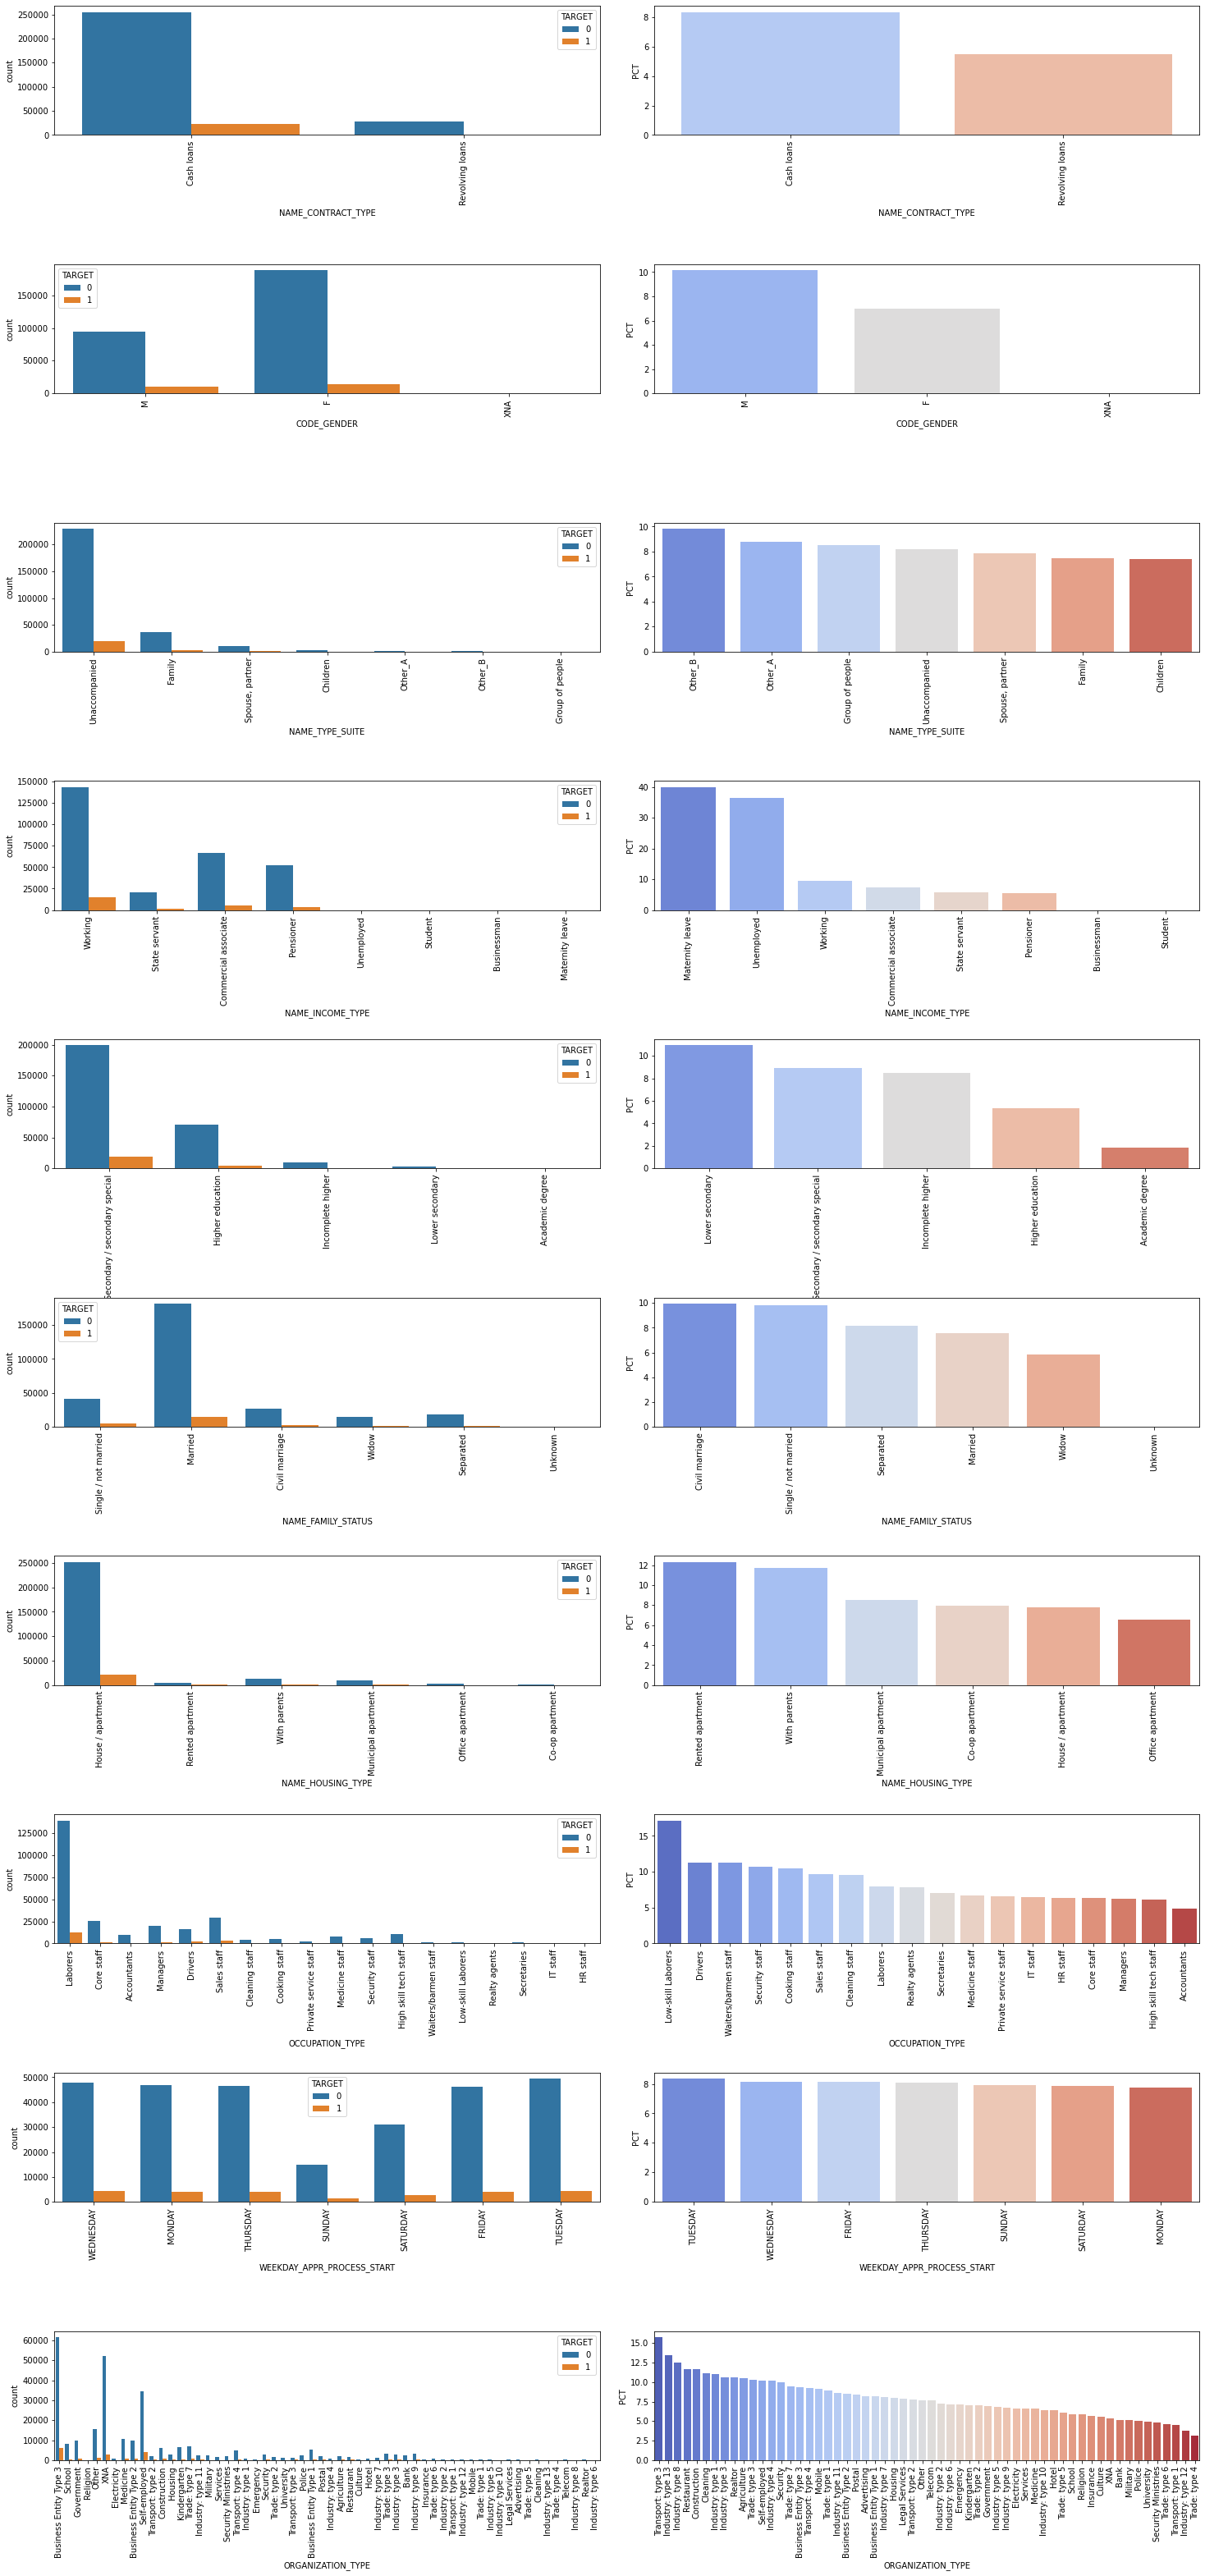

In [98]:
plt.figure(figsize=(25,55))

for i,var in enumerate(obj_var):
    data_pct=app_score_col_rmved[[var,'TARGET']].groupby([var],as_index=False).mean().sort_values(by="TARGET",ascending=False)
    data_pct['PCT']=data_pct['TARGET']*100

    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=app_score_col_rmved,x=var,hue="TARGET")
    plt.xticks(rotation=90)
    

    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)
    

In [99]:
# Name contract type(loan type)
# Most of the customer has taken cash Loan 
#customer who have taken cash loan are less likely to default 

#Code_gender
# most of the loans have been taken  by female 
#defalut rate for female less tha 7% which is safer and lesser than male 

# Name_Type_Suite
# unacompanied people had taken most of the loans and the default loans by unacompanied is low as compaired to others.

#Name_income_type 
#the safest segment is working professional 

#Name education Type 
#higher education is safest segment to give the loan with default rate of 5%


#Name_family_status
#married people are safe to target , default rate is 8%


#Name housing type 
#people having own House/apprtment are safer segment .

#Occupation type 
#low skilled laboures and drivers  are highest defulter 
#Accountent  are  less defulter 
# core staff and managers , laborers are  safer segment with defult rate of  (7.5% -10%).

#ORGANIZATION_TYPE
#transport_type_3 highest defaulter 
# others and business entity type_3 , self employed are good to with default rate arount 10%.


In [100]:
num_var = app_score_col_rmved.select_dtypes(include=['float64','int64']).columns
num_cat_var = app_score_col_rmved.select_dtypes(include=['float64','int64','category']).columns
len(num_var)

33

In [101]:
num_data=app_score_col_rmved[num_var]

In [102]:
#checking for correlation of defaulters and repayers and trying to find out the top 10 variable . 

In [103]:
defaulters=num_data[num_data['TARGET']==1].drop(['TARGET'],axis=1)
repayers=num_data[num_data["TARGET"]==0].drop(['TARGET'],axis=1)

In [104]:
defaulters.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,1827,1.0,3,2,9,0,0,0,0,0,0,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,1029,2.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,45.0,4409,2.0,3,3,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,0,81000.0,252000.0,14593.5,252000.0,0.028663,24794,365243,5391.0,4199,2.0,2,2,10,0,0,0,0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.005144,-0.010165
CNT_CHILDREN,-0.005144,1.000000,0.004796
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000


In [106]:
defaulters_corr=defaulters.corr()
defaulters_corr_unstack=defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:"corr"})

In [107]:
defaulters_corr_unstack.head()

,var1,var2,corr
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,CNT_CHILDREN,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN


In [108]:
defaulters_corr_unstack['corr']=abs(defaulters_corr_unstack['corr'])
defaulters_corr_unstack.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
163,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
131,AMT_ANNUITY,AMT_CREDIT,0.752195
263,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


In [109]:
repayers_corr=repayers.corr()
repayers_corr_unstack=repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:"corr"})

In [110]:
repayers_corr_unstack.head()

,var1,var2,corr
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,CNT_CHILDREN,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN


In [111]:
repayers_corr_unstack['corr']=abs(repayers_corr_unstack['corr'])
repayers_corr_unstack.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
163,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
131,AMT_ANNUITY,AMT_CREDIT,0.771297
263,DAYS_EMPLOYED,DAYS_BIRTH,0.626114


In [112]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


## univariate analysis for amount variable  only. 

In [113]:
amt_var=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY']

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

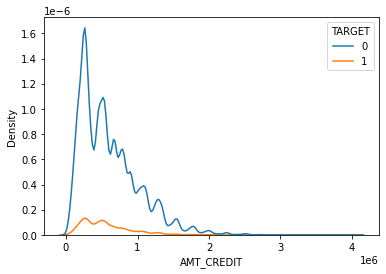

In [114]:
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue="TARGET")

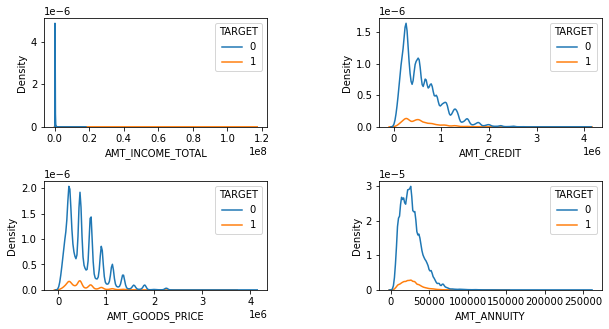

In [115]:
plt.figure(figsize=(10,5))
for i ,col in  enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue="TARGET")
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    

In [116]:
# most of the loans were given for the goods_price ranging between 0 to 1 ml
# most of the loans were given  for  AMT_credit of 1 ml 
# most the customers are paying annuity of the 0 to 50K
# mostly the customer have income 0 to 1ML

In [117]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


##  bivariate analysis

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

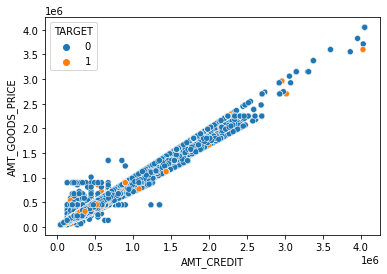

In [118]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y="AMT_GOODS_PRICE",hue="TARGET")

In [119]:
#AMT_CREDIT and AMT_GOODS_PRICE are linearly corelated
# most  number of defaulter found   when amount is less than 15ML  

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

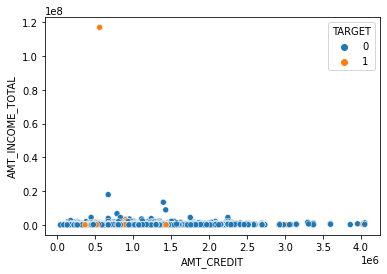

In [120]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y="AMT_INCOME_TOTAL",hue="TARGET")

In [121]:
## people having hving income less than or equals to 1 ml , are more likely to take loans  out of which whos are taking loan of 
# 1.5ML they are less likely to be defaulter  we can target income below 1 million and amount greater than 1.5 ml

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

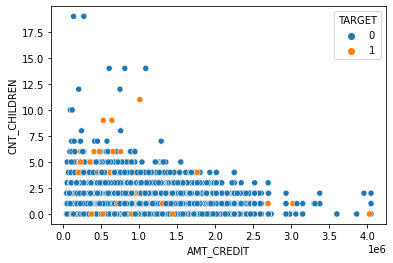

In [122]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y="CNT_CHILDREN",hue="TARGET")

In [123]:
# people having children 1 to less 5  are safer to give the loan 

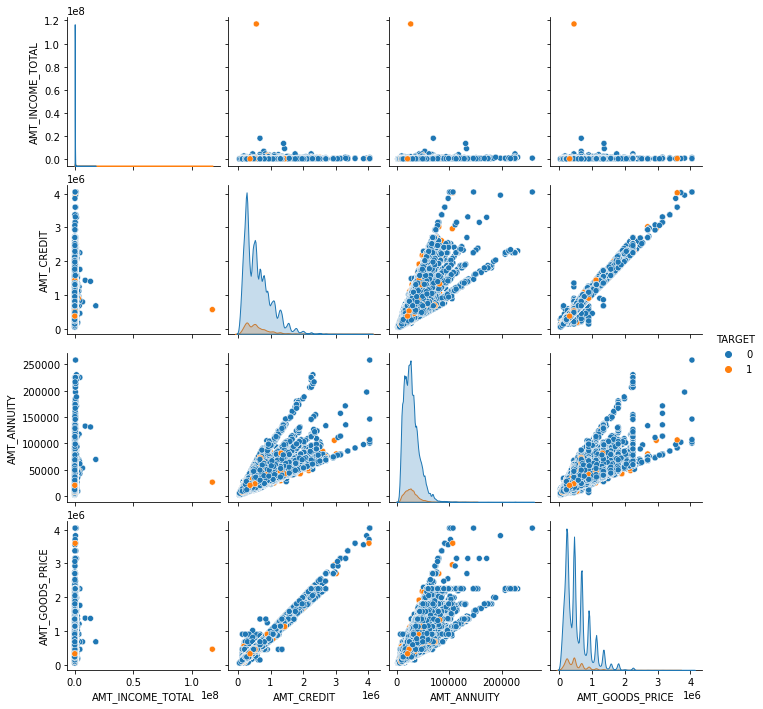

In [134]:
sns.pairplot(data=amt_var,hue='TARGET')

In [135]:
#people  who can pay the annuity of 100K are more lokely to get the loan that is up to  less than 2ml (safer segnment )

##  Bank should target the customers

In [ ]:
#  having low income i.e. below 1 ml
#  working in Others, Business Entity Type 3, Self Employed  org. type
#  working as Accountants, Core staff, Managers and Laborers 
#  having house/appartment and are married and having children not more than 5
#  Highly educated
#  preferably female

## Amount segment recommended -


In [136]:
# the credit amount should not be more than 1 ml
# annuity can be made of 50K (depending on the eligibility)
# income bracket could be below 1 ml